## Calculate the forcing at the top of the atmosphere(TOA) due to anthropogenic aerosols
### Data used: IPSL-CM6A

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import sys
sys.path.append('../scripts')
from forcing_IPSL_CM6A import RadiativeFluxData

In [38]:
# Load netcdf data
if __name__ == '__main__':

    # create RadiativeFluxData class
    RFD = RadiativeFluxData()
    RFD.read()

In [39]:
# Compute forcing at TOA using only shortwave fluxes

sw_balance_aer = RFD.rsdt_aer - RFD.rsut_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
sw_balance_control = RFD.rsdt_c - RFD.rsut_c  #control- without anthro aerosols

sw_forcing_toa = -sw_balance_control + sw_balance_aer 

In [40]:
# Compute forcing at TOA including outgoing longwave radiation

balance_aer = RFD.rsdt_aer - RFD.rsut_aer - RFD.rlut_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
balance_control = RFD.rsdt_c - RFD.rsut_c - RFD.rlut_c  #control- without anthro aerosols

forcing_toa = -balance_control + balance_aer 

In [41]:
# define a colorbar to control the gradient of colours in asymmetric colourbar and introduce white colour for zero values.
# matplotlib colorbar does not represent the actual weighting of the values in the colourbar given the asymmetry so use absolute values


#!!!! run cmap='RdBu_r' for the individual plots first to ascertain levels before defining ticks or levels here
levels = [-12, -10, -8, -6, -4, -2, -0.5, 0.5, 2, 4, 6, 8, 10] 
colors = ['#053061','#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white',  '#fae7dc','#fac7ae','#ec9274','#cf5347','#ab162a']

levels3 = [-3, -1.5, -0.5, 0.5, 1.5,3, 4.5,6]
colors3 = ['#bad9e9','#e6eff4','white', '#fce1d1', '#facab1','#f5ae8d','#e98c6e']

#adjust colours and levels and ticks as follows:
#ax.contourf(colors=colors, levels=levels)
#plt.colorbar(ticks=range(start,stop,step)) eg. range(-14,4,2)

In [ ]:
#Obtaining the colours from RdBu_r to use in the code above. From: https://stackoverflow.com/questions/33596491/extract-matplotlib-colormap-in-hex-format
from pylab import *

cmap = cm.get_cmap('RdBu_r', 20)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

In [6]:
# Notes: add_cyclic_point throws out an error due to continuous mapping of the longitude each time it's used. 
# And so does the TwoSlopeNorm or the diverging Norm
# Hack: re-run class code to load the data each time before plotting a new map or correcting the colorbar

# Still need to find a way to have white as a discrete colour range
# GeoAxis renders the colourbar into discrete ranges. Haven't figured how to undo it.

Text(0.0, 1.0, 'Radiative Balance at TOA (without Aerosols)')

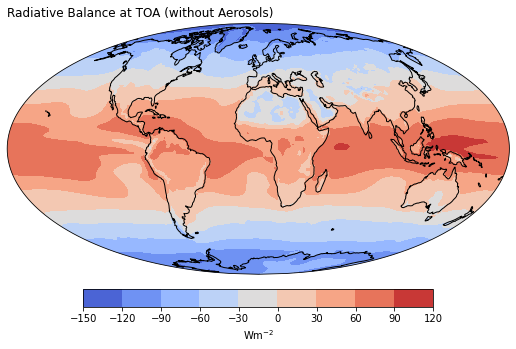

In [5]:
# Visualize simulated global historical data without anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
balance_control, RFD.lon = add_cyclic_point(balance_control, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(balance_control,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs,shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (without Aerosols)", loc='left', fontsize=12)
#plt.savefig("bal_control_TOA_IPSL_CM6A.pdf", bbox_inches='tight', transparent=True)

Text(0.0, 1.0, 'Radiative Balance at TOA (with Aerosols)')

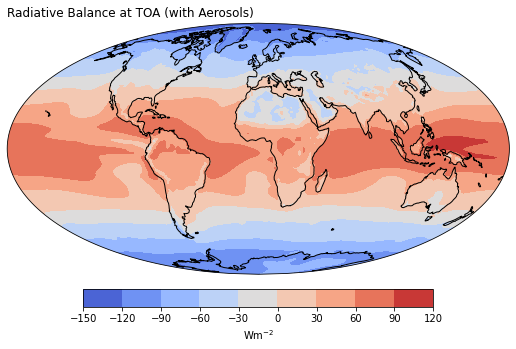

In [9]:
# Visualize simulated global historical data with anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax1.set_global()
ax1.coastlines()
balance_aer, RFD.lon = add_cyclic_point(balance_aer, coord=RFD.lon) #removes white longitutdinal line at centre
cs1 = ax1.contourf(RFD.lon,RFD.lat, np.mean(balance_aer,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs1, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (with Aerosols)", loc='left', fontsize=12)
#plt.savefig("bal_Aer_TOA_IPSL_CM6A.pdf", bbox_inches='tight', transparent=True)

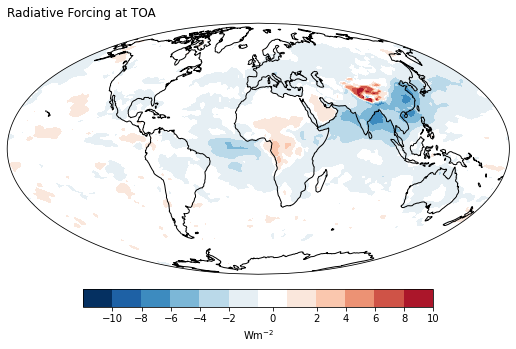

In [17]:
#Visualize radiaitve forcing at TOA with longwave radiation
vmax = np.max(np.mean(forcing_toa,axis=0))
vmin = np.min(np.mean(forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] ) #for representative intensity at boundary values for diverging colormaps
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #push zero as mid point of red and blue

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
forcing_toa, RFD.lon = add_cyclic_point(forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(forcing_toa,axis=0),norm=norm, transform=ccrs.PlateCarree(),colors=colors, levels=levels)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
plt.title("Radiative Forcing at TOA", loc='left', fontsize = 12)
plt.savefig("forcing_TOA_IPSL_CM6A.pdf", bbox_inches='tight', transparent=True)

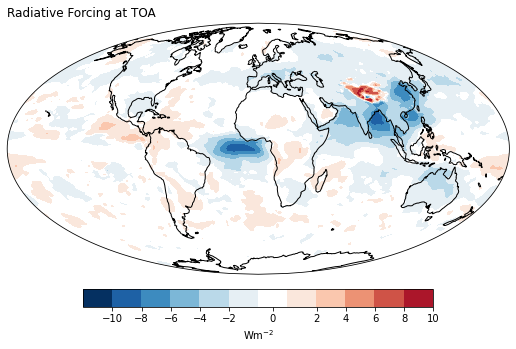

In [22]:
#Visualize radiaitve forcing at TOA with only shortwave

vmax = np.max(np.mean(sw_forcing_toa,axis=0))
vmin = np.min(np.mean(sw_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #set zero value to white colour

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
sw_forcing_toa, RFD.lon = add_cyclic_point(sw_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
contour_map =  ax.contourf(RFD.lon,RFD.lat,np.mean(sw_forcing_toa,axis=0),transform=ccrs.PlateCarree(),norm=norm, colors=colors,levels=levels)
plt.colorbar(contour_map, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal',ticks=[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
plt.title("Radiative Forcing at TOA", loc='left', fontsize = 12)
plt.savefig("sw_forcing_TOA_IPSL_CM6A.pdf", bbox_inches='tight', transparent=True)

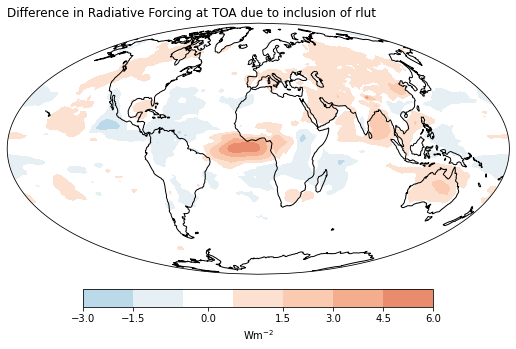

In [42]:
#Difference between the two forcings


diff_forcing_toa = forcing_toa - sw_forcing_toa 

vmax = np.max(np.mean(diff_forcing_toa,axis=0))
vmin = np.min(np.mean(diff_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) 

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
diff_forcing_toa, RFD.lon = add_cyclic_point(diff_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre

cs = ax.contourf(RFD.lon,RFD.lat,np.mean(diff_forcing_toa,axis=0), transform=ccrs.PlateCarree(), norm=norm, colors=colors3, levels=levels3)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal',ticks=[-3, -1.5, 0, 1.5,3, 4.5, 6])
plt.title("Difference in Radiative Forcing at TOA due to inclusion of rlut", loc='left', fontsize = 12)
plt.savefig("diff_forcing_TOA_IPSL_CM6A.pdf", bbox_inches='tight', transparent=True)